In [31]:
import cv2
import numpy as np
import time
from helper_functions import draw_flow
import matplotlib.pyplot as plt

In [32]:
cap = cv2.VideoCapture('video.MP4')


Starting


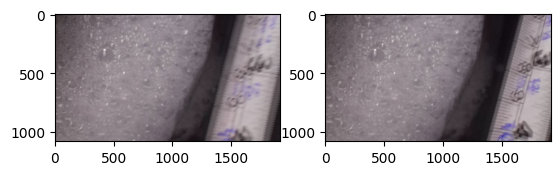

In [59]:

for i in range(10):
    ret, frame = cap.read()


ret, frame1 = cap.read()
ret2, frame2 = cap.read()

#plot both frames
plt.subplot(1,2,1)
plt.imshow(frame1)
plt.subplot(1,2,2)
plt.imshow(frame2)
plt.show()


In [60]:


frame_height, frame_width = frame1.shape[:2]
scale_factor = 0.5

# Calculate the ROI based on scale factor
w_roi = int(frame_width * scale_factor)
h_roi = int(frame_height * scale_factor)
x_roi = (frame_width - w_roi) // 2
y_roi = (frame_height - h_roi) // 2


In [61]:
roi_frame1 = frame1[y_roi:y_roi+h_roi, x_roi:x_roi+w_roi]
roi_frame2 = frame2[y_roi:y_roi+h_roi, x_roi:x_roi+w_roi]

In [63]:

# Apply contrast enhancement on the ROI
frame_YUV1 = cv2.cvtColor(roi_frame1, cv2.COLOR_BGR2YUV)
frame_YUV1[:, :, 0] = cv2.equalizeHist(frame_YUV1[:, :, 0])
roi_frame_contrast1 = cv2.cvtColor(frame_YUV1, cv2.COLOR_YUV2BGR)

frame_YUV2 = cv2.cvtColor(roi_frame2, cv2.COLOR_BGR2YUV)
frame_YUV2[:, :, 0] = cv2.equalizeHist(frame_YUV2[:, :, 0])
roi_frame_contrast2 = cv2.cvtColor(frame_YUV2, cv2.COLOR_YUV2BGR)

In [64]:
roi_frame_contrast_gray1 = cv2.cvtColor(roi_frame_contrast1, cv2.COLOR_BGR2GRAY)
roi_frame_contrast_gray2 = cv2.cvtColor(roi_frame_contrast2, cv2.COLOR_BGR2GRAY)

In [67]:
flow = cv2.calcOpticalFlowFarneback(roi_frame_contrast_gray1, roi_frame_contrast_gray2, None, pyr_scale=0.5, levels=3, winsize=50, iterations=5, poly_n=5, poly_sigma=1.2, flags=0)    

(540, 960, 2)


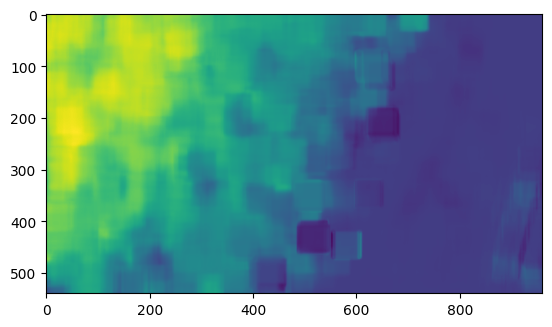

In [76]:
print(flow.shape)
plt.imshow(flow[:,:,0])

In [79]:
h, w = roi_frame_contrast1.shape[:2]
step = max(2, 50 // 2)  # Dynamically set step based on winsize
y, x = np.mgrid[step/2:h:step, step/2:w:step].reshape(2, -1).astype(np.int16)

fx, fy = flow[y, x].T


In [113]:
fx.shape

(836,)

In [86]:
flow

array([[[ 4.95419884e+00,  1.65073621e+00],
        [ 5.11752939e+00,  1.60387933e+00],
        [ 5.24428654e+00,  1.55353475e+00],
        ...,
        [-7.08000516e-05, -8.13876031e-05],
        [-6.87781139e-05, -7.98604524e-05],
        [-6.48745627e-05, -7.63684438e-05]],

       [[ 4.96050596e+00,  1.64949930e+00],
        [ 5.12277222e+00,  1.60307717e+00],
        [ 5.24789000e+00,  1.55346477e+00],
        ...,
        [-8.11045247e-05, -8.68303396e-05],
        [-7.86899036e-05, -8.49574935e-05],
        [-7.41902331e-05, -8.11302380e-05]],

       [[ 4.96670866e+00,  1.64526320e+00],
        [ 5.12704611e+00,  1.60008550e+00],
        [ 5.24990082e+00,  1.55215490e+00],
        ...,
        [-9.14059710e-05, -9.31263421e-05],
        [-8.84860783e-05, -9.10908493e-05],
        [-8.32982987e-05, -8.70847944e-05]],

       ...,

       [[ 4.62034225e-01, -7.90895075e-02],
        [ 4.87727851e-01, -8.94719884e-02],
        [ 5.10225356e-01, -1.00698501e-01],
        ...,
     